In [19]:
import sys;
sys.path.append("E:/JupyterEnviroment/Learning/MachineLearning/Network/cs231n/classifiers")

from imp import reload
reload(cs231n.classifiers.cnn)
from cs231n.data_utils import get_CIFAR10_data
from cs231n.layers import *
from cs231n.classifiers.fc_net import *
from cs231n.classifiers.cnn import *
import cs231n.classifiers.cnn
from cs231n.solver import *
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.layers import *
import matplotlib.pyplot as plt
import cs231n.classifiers.fc_net
import cs231n.optim
import cs231n.solver
import cs231n.layers
from time import time
from cs231n.fast_layers import conv_forward_fast, conv_backward_fast
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'cnn.ipynb' matched no files


In [71]:
x = np.random.randn(2, 3, 8, 8)
w = np.random.randn(3, 3, 3, 3)
b = np.random.randn(3,)
dout = np.random.randn(2, 3, 8, 8)
conv_param = {'stride': 1, 'pad': 1}

out, cache = conv_relu_forward(x, w, b, conv_param)
dx, dw, db = conv_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: conv_relu_forward(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_relu_forward(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_relu_forward(x, w, b, conv_param)[0], b, dout)

print ('Testing conv_relu:')
print ('dx error: ', rel_error(dx_num, dx))
print ('dw error: ', rel_error(dw_num, dw))
print ('db error: ', rel_error(db_num, db))

Testing conv_relu:
dx error:  3.3526472642233784e-09
dw error:  2.0207046558066917e-10
db error:  5.442738683407279e-10


In [66]:
from cs231n.layers import conv_relu_pool_forward, conv_relu_pool_backward

x = np.random.randn(2, 3, 16, 16)
w = np.random.randn(3, 3, 3, 3)
b = np.random.randn(3,)
dout = np.random.randn(2, 3, 8, 8)
conv_param = {'stride': 1, 'pad': 1}
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

out, cache = conv_relu_pool_forward(x, w, b, conv_param, pool_param)
dx, dw, db = conv_relu_pool_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_relu_pool_forward(x, w, b, conv_param, pool_param)[0], b, dout)

print ('Testing conv_relu_pool')
print ('dx error: ', rel_error(dx_num, dx))
print ('dw error: ', rel_error(dw_num, dw))
print ('db error: ', rel_error(db_num, db))

Testing conv_relu_pool
dx error:  1.0198551874167231e-07
dw error:  2.1125541141935668e-10
db error:  4.1270493489326986e-11


In [15]:
data = get_CIFAR10_data()

## Test conv_forward_naive

In [180]:
x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

conv_param = {'stride': 2, 'pad': 1}
out, _ = conv_forward_naive(x, w, b, conv_param)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])

# Compare your output to ours; difference should be around 1e-8
print ('difference: ', rel_error(out, correct_out))

difference:  2.2121476417505994e-08


## Test conv_backward_naive

In [20]:
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'pad': 1}

dx_num = eval_numerical_gradient_array(lambda x: conv_forward_naive(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_forward_naive(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_forward_naive(x, w, b, conv_param)[0], b, dout)

out, cache = conv_forward_naive(x, w, b, conv_param)
dx, dw, db = conv_backward_naive(dout, cache)

# Your errors should be around 1e-9'
print ('Testing conv_backward_naive function')
print ('dx error: ', rel_error(dx, dx_num))
print ('dw error: ', rel_error(dw, dw_num))
print ('db error: ', rel_error(db, db_num))

Testing conv_backward_naive function
dx error:  4.75515700052977e-09
dw error:  8.654328264954807e-09
db error:  2.414340607753245e-11


## Test Convolution

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  del sys.path[0]


(266, 400, 3) (517, 517, 3)
(266, 266, 3) (517, 517, 3)


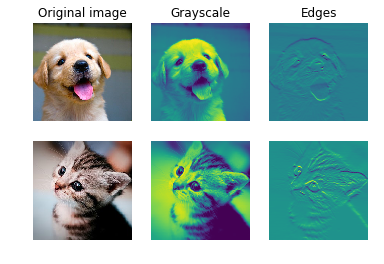

In [183]:
from scipy.misc import imread, imresize

kitten, puppy = imread('kitten.jpg'), imread('puppy.jpg')
# kitten is wide, and puppy is already square
print(kitten.shape , puppy.shape)
d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:, int(d/2):int(-d/2), :]
print(kitten_cropped.shape , puppy.shape)

img_size = 200   # Make this smaller if it runs too slow
x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = imresize(puppy, (img_size, img_size)).transpose((2, 0, 1))
x[1, :, :, :] = imresize(kitten_cropped, (img_size, img_size)).transpose((2, 0, 1))

# Set up a convolutional weights holding 2 filters, each 3x3
w = np.zeros((2, 3, 3, 3))

# The first filter converts the image to grayscale.
# Set up the red, green, and blue channels of the filter.
w[0, 0, :, :] = [[0, 0, 0], [0, 0.3, 0], [0, 0, 0]]
w[0, 1, :, :] = [[0, 0, 0], [0, 0.6, 0], [0, 0, 0]]
w[0, 2, :, :] = [[0, 0, 0], [0, 0.1, 0], [0, 0, 0]]

# Second filter detects horizontal edges in the blue channel.
w[1, 2, :, :] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

# Vector of biases. We don't need any bias for the grayscale
# filter, but for the edge detection filter we want to add 128
# to each output so that nothing is negative.
b = np.array([0, 128])

# Compute the result of convolving each input in x with each filter in w,
# offsetting by b, and storing the results in out.
out, _ = conv_forward_naive(x, w, b, {'stride': 1, 'pad': 1})

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_noax(puppy, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_noax(out[0, 0])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_noax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_noax(kitten_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_noax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_noax(out[1, 1])
plt.show()

## Test max_pool_forward_naive

In [7]:
x_shape = (2, 3, 4, 4)
x = np.linspace(-0.3, 0.4, num=np.prod(x_shape)).reshape(x_shape)
pool_param = {'pool_width': 2, 'pool_height': 2, 'stride': 2}

out, _ = max_pool_forward_naive(x, pool_param)

correct_out = np.array([[[[-0.26315789, -0.24842105],
                          [-0.20421053, -0.18947368]],
                         [[-0.14526316, -0.13052632],
                          [-0.08631579, -0.07157895]],
                         [[-0.02736842, -0.01263158],
                          [ 0.03157895,  0.04631579]]],
                        [[[ 0.09052632,  0.10526316],
                          [ 0.14947368,  0.16421053]],
                         [[ 0.20842105,  0.22315789],
                          [ 0.26736842,  0.28210526]],
                         [[ 0.32631579,  0.34105263],
                          [ 0.38526316,  0.4       ]]]])

# Compare your output with ours. Difference should be around 1e-8.
print ('Testing max_pool_forward_naive function:')
print ('difference: ', rel_error(out, correct_out))

Testing max_pool_forward_naive function:
difference:  4.1666665157267834e-08


## Test max_pool_backward_naive

In [55]:
x = np.random.randn(3, 2, 8, 8)
dout = np.random.randn(3, 2, 4, 4)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

dx_num = eval_numerical_gradient_array(lambda x: max_pool_forward_naive(x, pool_param)[0], x, dout)

out, cache = max_pool_forward_fast(x, pool_param)
dx = max_pool_backward_fast(dout, cache)

# Your error should be around 1e-12
print ('Testing max_pool_backward_naive function:')
print ('dx error: ', rel_error(dx, dx_num))

Testing max_pool_backward_naive function:
dx error:  3.2756254477994185e-12


## Test convolution fast

In [25]:
x = np.random.randn(100, 3, 31, 31)
w = np.random.randn(25, 3, 3, 3)
b = np.random.randn(25,)
dout = np.random.randn(100, 25, 16, 16)
conv_param = {'stride': 2, 'pad': 1}

t0 = time()
out_naive, cache_naive = conv_forward_naive(x, w, b, conv_param)
t1 = time()
out_fast, cache_fast = conv_forward_fast(x, w, b, conv_param)
t2 = time()

print ('Testing conv_forward_fast:')
print ('Naive: %fs' % (t1 - t0))
print ('Fast: %fs' % (t2 - t1))
print ('Speedup: %fx' % ((t1 - t0) / (t2 - t1)))
print ('Difference: ', rel_error(out_naive, out_fast))

t0 = time()
dx_naive, dw_naive, db_naive = conv_backward_naive(dout, cache_naive)
t1 = time()
dx_fast, dw_fast, db_fast = conv_backward_fast(dout, cache_fast)
t2 = time()

print ('\nTesting conv_backward_fast:')
print ('Naive: %fs' % (t1 - t0))
print ('Fast: %fs' % (t2 - t1))
print ('Speedup: %fx' % ((t1 - t0) / (t2 - t1)))
print ('dx difference: ', rel_error(dx_naive, dx_fast))
print ('dw difference: ', rel_error(dw_naive, dw_fast))
print ('db difference: ', rel_error(db_naive, db_fast))

Testing conv_forward_fast:
Naive: 0.144610s
Fast: 0.015958s
Speedup: 9.061762x
Difference:  1.9116284337880204e-11

Testing conv_backward_fast:
Naive: 0.602424s
Fast: 0.013929s
Speedup: 43.250698x
dx difference:  6.321719396469209e-11
dw difference:  1.1779989708717756e-13
db difference:  0.0


## Test Max_pool_backward_fast

In [65]:

x = np.random.randn(100, 3, 32, 32)
dout = np.random.randn(100, 3, 16, 16)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

t0 = time()
out_naive, cache_naive = max_pool_forward_naive(x, pool_param)
t1 = time()
out_fast, cache_fast = max_pool_forward_fast(x, pool_param)
t2 = time()

print ('Testing pool_forward_fast:')
print ('Naive: %fs' % (t1 - t0))
print ('fast: %fs' % (t2 - t1))
print ('speedup: %fx' % ((t1 - t0) / (t2 - t1)))
print ('difference: ', rel_error(out_naive, out_fast))

t0 = time()
dx_naive = max_pool_backward_naive(dout, cache_naive)
t1 = time()
dx_fast = max_pool_backward_fast(dout, cache_fast)
t2 = time()
print ('\nTesting pool_backward_fast:')
print ('Naive: %fs' % (t1 - t0))
print ('speedup: %fx' % ((t1 - t0) / (t2 - t1)))
print ('dx difference: ', rel_error(dx_naive, dx_fast))

Testing pool_forward_fast:
Naive: 0.006981s
fast: 0.002991s
speedup: 2.333626x
difference:  0.0

Testing pool_backward_fast:
Naive: 0.021940s
speedup: 1.571324x
dx difference:  0.0


In [64]:
x = np.random.randn(3, 2, 8, 8)
dout = np.random.randn(3, 2, 4, 4)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

dx_num = eval_numerical_gradient_array(lambda x: max_pool_forward_naive(x, pool_param)[0], x, dout)

out, cache = max_pool_forward_naive(x, pool_param)
dx = max_pool_backward_naive(dout, cache)

# Your error should be around 1e-12
print ('Testing max_pool_backward_naive function:')
print ('dx error: ', rel_error(dx, dx_num))

Testing max_pool_backward_naive function:
dx error:  3.275643978145791e-12


In [8]:
num_train = 100
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(weight_scale=1e-2)

solver = Solver(model, small_data,
                num_epochs=20, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 5e-4,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 40) loss: 2.424867
(Epoch 0 / 20) train acc: 0.270000; val_acc: 0.127000
(Iteration 2 / 40) loss: 2.168156
(Epoch 1 / 20) train acc: 0.410000; val_acc: 0.161000
(Iteration 3 / 40) loss: 1.701370
(Iteration 4 / 40) loss: 1.929670
(Epoch 2 / 20) train acc: 0.540000; val_acc: 0.161000
(Iteration 5 / 40) loss: 1.383904
(Iteration 6 / 40) loss: 1.523177
(Epoch 3 / 20) train acc: 0.630000; val_acc: 0.196000
(Iteration 7 / 40) loss: 1.499138
(Iteration 8 / 40) loss: 1.127415
(Epoch 4 / 20) train acc: 0.650000; val_acc: 0.228000
(Iteration 9 / 40) loss: 1.103682
(Iteration 10 / 40) loss: 1.170490
(Epoch 5 / 20) train acc: 0.770000; val_acc: 0.200000
(Iteration 11 / 40) loss: 0.683072
(Iteration 12 / 40) loss: 0.771685
(Epoch 6 / 20) train acc: 0.760000; val_acc: 0.196000
(Iteration 13 / 40) loss: 0.734114
(Iteration 14 / 40) loss: 0.573238
(Epoch 7 / 20) train acc: 0.800000; val_acc: 0.213000
(Iteration 15 / 40) loss: 0.431283
(Iteration 16 / 40) loss: 0.660013
(Epoch 8 / 20) tr

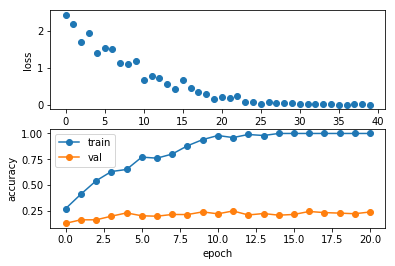

In [9]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [20]:
model = ThreeLayerConvNet(weight_scale=0.001, hidden_dim=500, reg=0.001)
num_train = 100
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}
solver = Solver(model, small_data,
                num_epochs=1, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=20)
solver.train()

w2 (8192, 500)
(50, 32, 16, 16)
(Iteration 1 / 2) loss: 2.304763
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(Epoch 0 / 1) train acc: 0.130000; val_acc: 0.084000
(50, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(100, 32, 16, 16)
(Epoch 1 / 1) train acc: 0.120000; val_acc: 0.094000


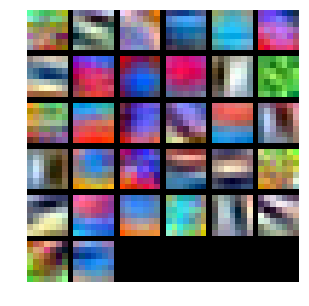

In [13]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

In [ ]:
a = numpy.dot()